In [31]:
%load_ext autoreload
%autoreload 2

import pickle, json
from enterprise_extensions.models import model_2a, model_1
from enterprise.signals.parameter import sample
import numpy as np
from impulse.pta.pta_utils import setup_sampler
from impulse.pta.hypermodel import HyperModel
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time
from la_forge import core, diagnostics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [33]:
pta1 = model_1([psrs[0]], noisedict=params, tm_marg=True, tnequad=True, tm_svd=True)
pta2a = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [34]:
mod_index = np.arange(2)
pta = dict.fromkeys(mod_index)
pta[0] = pta1
pta[1] = pta2a

In [35]:
super_model = HyperModel(pta)

ndim = len(super_model.param_names)
groups = super_model.get_parameter_groups()

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [36]:
super_model.param_names

['B1855+09_red_noise_gamma',
 'B1855+09_red_noise_log10_A',
 'gw_log10_A',
 'nmodel']

In [37]:
super_model.log_weights

In [40]:
sampler = setup_sampler(super_model, outdir='hm_test', hypermodel=True, ntemps=4, ncores=1, num_samples=1e6, ret_chain=True)

2022-07-29 21:53:48.358 | INFO     | impulse.pta.pta_utils:setup_sampler:200 - Adding nmodel uniform distribution draws...

2022-07-29 21:53:48.360 | INFO     | impulse.pta.pta_utils:setup_sampler:210 - Adding red noise prior draws...

2022-07-29 21:53:48.360 | INFO     | impulse.pta.pta_utils:setup_sampler:245 - Adding GWB uniform distribution draws...



In [41]:
chain = sampler.sample()

  1%|▏         | 13/1000 [00:15<19:40,  1.20s/it]


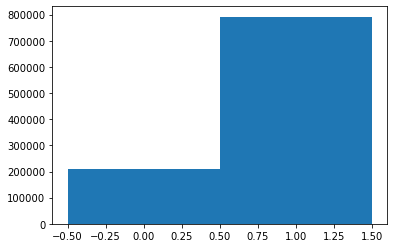

In [13]:
plt.hist(chain[:, -1, 0], bins=2)
plt.show()

In [14]:
from enterprise_extensions import hypermodel

Do not have acor package


In [25]:
super_model = hypermodel.HyperModel(pta)

ndim = len(super_model.param_names)
groups = super_model.get_parameter_groups()
x0 = super_model.initial_sample()

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [26]:
sampler = super_model.setup_sampler(outdir='pt_hm')

Adding red noise prior draws...

Adding GWB uniform distribution draws...

Adding gw param prior draws...

Adding nmodel uniform distribution draws...



In [27]:
sampler.sample(x0, int(1e6), AMweight=25, SCAMweight=40, DEweight=55)

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.873935 s Acceptance rate = 0.479822Adding DE jump with weight 55
Finished 99.90 percent in 278.439337 s Acceptance rate = 0.444882
Run Complete


In [28]:
with open('./pt_hm/chain_1.txt', 'r') as f:
    ptmcmc_chain = np.loadtxt(f)

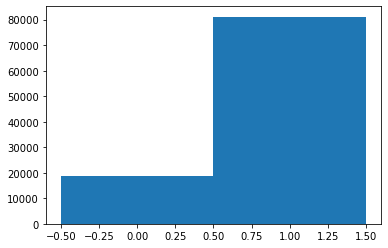

In [30]:
plt.hist(ptmcmc_chain[:, -5], bins=2)
plt.show()